# Python Refresher & PyTorch Intro

Throughout the upcoming labs, you will be learning new concepts, so why don't you make your own python package with all the new concepts implemented in classes & objects and publish it to the python open source community!

Let's get started!

# 1. Python.. Not the basics, Senior!

> We will not be going through the very basics (again) but feel free to watch this [crash course](https://youtu.be/_uQrJ0TkZlc?feature=shared) as a refresher.
<iframe width="560" height="315" src="https://www.youtube.com/embed/_uQrJ0TkZlc?si=HwXx2V9g541v78_O" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

## 1.1. Classes & Functions: Distributions

We will implement two classes for statistical distributions and their methods to recall Python classes and functions. After that, we will wrap them in a package and publish it to [PyPi](https://pypi.org/), the official Python repository where all Python packages are stored.

### *1.1.1. General Distribution class*

The `Distribution` class is a generic distribution class that is used for calculating and visualizing a probability distribution. It has the following attributes:

- `mean` (float): representing the mean value of the distribution, default = 0
- `stdev` (float): representing the standard deviation of the distribution, default = 1
- `data` (list of floats): a list of floats extracted from the data file

-	Let's create the class and initialize it with these attributes in the `__init__` constructor function.

```python
	class Distribution:
		def __init__(self, mu=0, sigma=1):
			self.mean = mu
			self.stdev = sigma
			self.data = []
```
-	The `__init__` method is the constructor of the `Distribution` class. It initializes the `mean`, `stdev`, and `data` attributes of the class. The `mu` parameter represents the mean value of the distribution (default value is 0), and the `sigma` parameter represents the standard deviation of the distribution (default value is 1).

- 	Great! Now how are we going to extract data from the file? let's define a function for that.

```python
		def read_data_file(self, file_name):	
			with open(file_name) as file:
				data_list = []
				line = file.readline()
				while line:
					data_list.append(int(line))
					line = file.readline()
			file.close()
			self.data = data_list
```
- The `read_data_file` method is used to read data from a text file. The text file should have one number (float) per line. The numbers are stored in the `data` attribute of the class. The `file_name` parameter is the name of the file to read from.

- This method opens the file using the `open` function and reads the lines of the file one by one. Each line is converted to an integer using the `int` function and appended to the `data_list` list. Finally, the `data` attribute is assigned the value of `data_list`.

	**Note: It is important to close the file after reading it using the `file.close()` statement.

In [ ]:
class Distribution:
	
	def __init__(self, mu=0, sigma=1):
	
		""" Generic distribution class for calculating and 
		visualizing a probability distribution.
	
		Attributes:
			mean (float) representing the mean value of the distribution
			stdev (float) representing the standard deviation of the distribution
			data_list (list of floats) a list of floats extracted from the data file
			"""
		
		self.mean = mu
		self.stdev = sigma
		self.data = []


	def read_data_file(self, file_name):
	
		"""Function to read in data from a txt file. The txt file should have
		one number (float) per line. The numbers are stored in the data attribute.
				
		Args:
			file_name (string): name of a file to read from
		
		Returns:
			None
		
		"""
			
		with open(file_name) as file:
			data_list = []
			line = file.readline()
			while line:
				data_list.append(int(line))
				line = file.readline()
		file.close()
	
		self.data = data_list

### *1.1.2. Gaussian Distribution Class*

The `Gaussian` class is a subclass of the `Distribution` class. It represents a Gaussian distribution and provides methods for calculating and visualizing the distribution.


It has the following attributes:

- **Attributes**

	- `mean` (float): representing the mean value of the distribution.
	- `stdev` (float): representing the standard deviation of the distribution.
	- `data_list` (list of floats): a list of floats extracted from the data file.

Which are the same attributes for the General Distribution class, So we will stick to the DRY (Don't Repeat Yourself) principle and inherit these attributes from it.

- **Methods**
	```python
	class Gaussian(Distribution):
		def __init__(self, mu=0, sigma=1):
			Distribution.__init__(self, mu, sigma)
	```
	- `__init__(self, mu=0, sigma=1)`: Initializes a `Gaussian` object with the specified mean (`mu`) and standard deviation (`sigma`). It calls the `__init__` method of the `Distribution` class to initialize the mean, standard deviation, and data attributes.

	Now, we want to calculate the mean and standard deviaton for this class so we will implement two functions for that:

	```python	
		def calculate_mean(self):			
			avg = 1.0 * sum(self.data) / len(self.data)
			self.mean = avg
			return self.mean
	```
	- `calculate_mean(self)`: Calculates the mean of the data set. It returns the mean as a float.
	
	```python
		def calculate_stdev(self, sample=True):
			if sample:
				n = len(self.data) - 1
			else:
				n = len(self.data)
			mean = self.calculate_mean()
			sigma = 0
			for d in self.data:
				sigma += (d - mean) ** 2
			sigma = math.sqrt(sigma / n)
			self.stdev = sigma
			return self.stdev
	```
	- `calculate_stdev(self, sample=True)`: Calculates the standard deviation of the data set. The `sample` parameter indicates whether the data represents a sample or population. It returns the standard deviation as a float.

	Next step is plotting these data points using matplotlib:

	```python
		def plot_histogram(self):
			plt.hist(self.data)
			plt.title('Histogram of Data')
			plt.xlabel('data')
			plt.ylabel('count')
	```
	- `plot_histogram(self)`: Outputs a histogram of the instance variable data using the `matplotlib.pyplot` library.

	What if we wanted to add two distributions together or represent the characteristics of our Gaussian distribution instance? We can simply do that by overriding the magic methods!

	```python
		def __add__(self, other):
		result = Gaussian()
		result.mean = self.mean + other.mean
		result.stdev = math.sqrt(self.stdev ** 2 + other.stdev ** 2)
		return result
	```
	- `__add__(self, other)`: Adds together two Gaussian distributions. The `other` parameter is a `Gaussian` instance. It returns a new `Gaussian` distribution with the mean and standard deviation calculated from the sum of the two distributions.

	```python
		def __repr__(self):
		return "mean {}, standard deviation {}".format(self.mean, self.stdev)
	```
	- `__repr__(self)`: Outputs the characteristics of the `Gaussian` instance as a string.
	
	**BONUS**: Try to search about PDF (Probability Density Function) and look at these two:
	```python
		def pdf(self, x):
			return (1.0 / (self.stdev * math.sqrt(2*math.pi))) * math.exp(-0.5*((x - self.mean) / self.stdev) ** 2)
	```
	- `pdf(self, x)`: Calculates the probability density function (PDF) for the Gaussian distribution at the specified point `x`. It returns the PDF value as a float.

	```python
		def plot_histogram_pdf(self, n_spaces = 50):
		mu = self.mean
		sigma = self.stdev
		min_range = min(self.data)
		max_range = max(self.data)
		 # calculates the interval between x values
		interval = 1.0 * (max_range - min_range) / n_spaces
		x = []
		y = []
		# calculate the x values to visualize
		for i in range(n_spaces):
			tmp = min_range + interval*i
			x.append(tmp)
			y.append(self.pdf(tmp))
		# make the plots
		fig, axes = plt.subplots(2,sharex=True)
		fig.subplots_adjust(hspace=.5)
		axes[0].hist(self.data, density=True)
		axes[0].set_title('Normed Histogram of Data')
		axes[0].set_ylabel('Density')
		axes[1].plot(x, y)
		axes[1].set_title('Normal Distribution for \n Sample Mean and Sample Standard Deviation')
		axes[0].set_ylabel('Density')
		plt.show()

		return x, y
	```
	- `plot_histogram_pdf(self, n_spaces=50)`: Plots the normalized histogram of the data and the probability density function (PDF) along the same range. The `n_spaces` parameter specifies the number of data points. It returns the x and y values for the PDF plot as lists.

In [ ]:
import math
import matplotlib.pyplot as plt
# from .Generaldistribution import Distribution uncomment this line when you copy the code to a .py file later

class Gaussian(Distribution):
	""" Gaussian distribution class for calculating and 
	visualizing a Gaussian distribution.
	
	Attributes:
		mean (float) representing the mean value of the distribution
		stdev (float) representing the standard deviation of the distribution
		data_list (list of floats) a list of floats extracted from the data file
			
	"""
	def __init__(self, mu=0, sigma=1):
		
		Distribution.__init__(self, mu, sigma)
	
		
	
	def calculate_mean(self):
	
		"""Function to calculate the mean of the data set.
		
		Args: 
			None
		
		Returns: 
			float: mean of the data set
	
		"""
					
		avg = 1.0 * sum(self.data) / len(self.data)
		
		self.mean = avg
		
		return self.mean



	def calculate_stdev(self, sample=True):

		"""Function to calculate the standard deviation of the data set.
		
		Args: 
			sample (bool): whether the data represents a sample or population
		
		Returns: 
			float: standard deviation of the data set
	
		"""

		if sample:
			n = len(self.data) - 1
		else:
			n = len(self.data)
	
		mean = self.calculate_mean()
	
		sigma = 0
	
		for d in self.data:
			sigma += (d - mean) ** 2
		
		sigma = math.sqrt(sigma / n)
	
		self.stdev = sigma
		
		return self.stdev
		
		
		
	def plot_histogram(self):
		"""Function to output a histogram of the instance variable data using 
		matplotlib pyplot library.
		
		Args:
			None
			
		Returns:
			None
		"""
		plt.hist(self.data)
		plt.title('Histogram of Data')
		plt.xlabel('data')
		plt.ylabel('count')
		
		
		
	def pdf(self, x):
		"""Probability density function calculator for the gaussian distribution.
		
		Args:
			x (float): point for calculating the probability density function
			
		
		Returns:
			float: probability density function output
		"""
		
		return (1.0 / (self.stdev * math.sqrt(2*math.pi))) * math.exp(-0.5*((x - self.mean) / self.stdev) ** 2)
		

	def plot_histogram_pdf(self, n_spaces = 50):

		"""Function to plot the normalized histogram of the data and a plot of the 
		probability density function along the same range
		
		Args:
			n_spaces (int): number of data points 
		
		Returns:
			list: x values for the pdf plot
			list: y values for the pdf plot
			
		"""
		
		mu = self.mean
		sigma = self.stdev

		min_range = min(self.data)
		max_range = max(self.data)
		
		 # calculates the interval between x values
		interval = 1.0 * (max_range - min_range) / n_spaces

		x = []
		y = []
		
		# calculate the x values to visualize
		for i in range(n_spaces):
			tmp = min_range + interval*i
			x.append(tmp)
			y.append(self.pdf(tmp))

		# make the plots
		fig, axes = plt.subplots(2,sharex=True)
		fig.subplots_adjust(hspace=.5)
		axes[0].hist(self.data, density=True)
		axes[0].set_title('Normed Histogram of Data')
		axes[0].set_ylabel('Density')

		axes[1].plot(x, y)
		axes[1].set_title('Normal Distribution for \n Sample Mean and Sample Standard Deviation')
		axes[0].set_ylabel('Density')
		plt.show()

		return x, y
		
	def __add__(self, other):
		
		"""Function to add together two Gaussian distributions
		
		Args:
			other (Gaussian): Gaussian instance
			
		Returns:
			Gaussian: Gaussian distribution
			
		"""
		
		result = Gaussian()
		result.mean = self.mean + other.mean
		result.stdev = math.sqrt(self.stdev ** 2 + other.stdev ** 2)
		
		return result
		
		
	def __repr__(self):
	
		"""Function to output the characteristics of the Gaussian instance
		
		Args:
			None
		
		Returns:
			string: characteristics of the Gaussian
		
		"""
		
		return "mean {}, standard deviation {}".format(self.mean, self.stdev)

## 1.2. Making a Python Package and Publishing to PyPI
Next up, contribute to open source!

1. **Create a Project Directory**: Start by creating a new directory for your project. This will serve as the root directory for your Python package.

2. **Set Up the Package Structure**: Inside the project directory, create a new directory with the name of your package. This directory will contain the source code for your package.
Next, create a file named `__init__.py` inside the package directory. This file is required to mark the directory as a Python package. The `__init__.py` file is executed when the package is imported, and it can be used to define variables, import modules, or perform any other initialization tasks that are required for the package.

3. **Write Your Package Code**: Inside the package directory, write the code for your package. This can include modules, classes, functions, etc. Organize your code in a way that makes sense for your package.

4. **Create a `setup.py` File**: In the project directory, create a file named `setup.py`. This file is used to define the metadata and dependencies for your package. Your project directory should look like this with the code for each class in previous cells:
<br/>
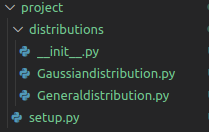

5. **Modify `setup.py`**: Open setup.py and define your package metadata and dependencies. Here is an example `setup.py` file:
	```python
	from setuptools import setup
	setup(
		name='your-package-name',
		version='1.0.0',
		description='A short description of your package',
		author='Your Name',
		author_email='your-email@example.com',
		url='https://github.com/your-username/your-package-repo',
		packages=['your_package_name'],
		install_requires=[
			'dependency1',
			'dependency2',
		],
	)
	```

- For now, you can set the content of `setup.py` to be like this
	```python
	from setuptools import setup
	setup(name='distributions',
		version='0.1',
		description='Gaussian distributions',
		packages=['distributions'],
		zip_safe=False)
	```
	
- And `__init.py__` to be like this
	```python
	from .Gaussiandistribution import Gaussian
	```

6. Create an account on [PyPi](https://pypi.org/account/register/)

7. Open the powershell or terminal and change directory to your project directory and run these commands
```bash
	python3 -m pip install --user --upgrade setuptools wheel
	python3 setup.py sdist bdist_wheel
	python3 -m pip install --user --upgrade twine
	twine upload dist/*
```
You will be prompt to enter your username and password, that's completely okay

8. Try to install your package anywhere with this command
```bash
	pip install packageName
```

9. Done!

# 2. Hello PyTorch

> Getting started with the dynamic computational graph framework with a simple linear regression

## 2.1. Simple Linear Regression

/home/iinjyi/miniconda3/envs/torch-env/lib/python3.12/site-packages/torch/autograd/__init__.py:266: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at /opt/conda/conda-bld/pytorch_1711403463728/work/c10/cuda/CUDAFunctions.cpp:108.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch [1/10], Loss: 308.071044921875
Epoch [2/10], Loss: 14.387263298034668
Epoch [3/10], Loss: 0.9105124473571777
Epoch [4/10], Loss: 0.2900811731815338
Epoch [5/10], Loss: 0.25953325629234314
Epoch [6/10], Loss: 0.25606808066368103
Epoch [7/10], Loss: 0.25386273860931396
Epoch [8/10], Loss: 0.2517321705818176
Epoch [9/10], Loss: 0.24962207674980164
Epoch [10/10], Loss: 0.2475300133228302
Predicted output for input 4: 8.455302238464355


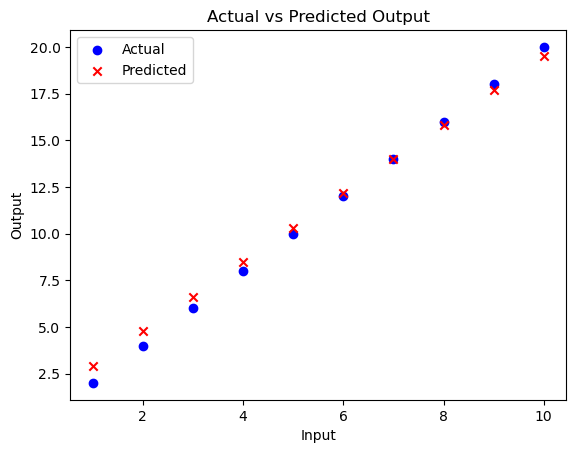

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the input data
x = torch.tensor([[1.0], [2.0], [3.0], [4.0], [5.0], [6.0], [7.0], [8.0], [9.0], [10.0]])
y = torch.tensor([[2.0], [4.0], [6.0], [8.0], [10.0], [12.0], [14.0], [16.0], [18.0], [20.0]])

# Define the linear regression model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # 1 input feature, 1 output feature

    def forward(self, x):
        return self.linear(x)

model = LinearRegression()

# Define the loss function and optimizer
criterion = nn.MSELoss() #mean squared error loss
optimizer = optim.SGD(model.parameters(), lr=0.01) #stochastic gradient descent

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x)
    loss = criterion(outputs, y)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}")

# Test the model
test_input = torch.tensor([[4.0]])
predicted_output = model(test_input)
print(f"Predicted output for input 4: {predicted_output.item()}")

# Plot the actual output
plt.scatter(x, y, color='blue', label='Actual')

# Plot the predicted output
plt.scatter(x, model(x).detach().numpy(), color='red', label='Predicted', marker='x')
plt.title('Actual vs Predicted Output')

# Add labels and legend
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()

# Show the plot
plt.show()


## 2.2. Observe & Think

- Based on the plot above, when do you think we should have stopped model training?
- What would happen if we change the optimizer or criterion?